In [2]:
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K
from keras.applications.xception import Xception

Using TensorFlow backend.


In [3]:
base_model = Xception(weights='imagenet', include_top=False)
# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(5, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

83697664/83683744 [==============================] - 227s 3us/step


In [13]:
import pathlib
import tensorflow as tf

In [41]:
data_root = pathlib.Path('/home/hngu4068/dr_data/Test')

In [46]:
all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in data_root.iterdir()]
img_path = all_image_paths[2]
img_raw = tf.read_file(img_path)
img_tensor = tf.image.decode_image(img_raw)

In [45]:
all_image_paths

['/home/hngu4068/dr_data/Test/test_image111.tif',
 '/home/hngu4068/dr_data/Test/test_image13.tif',
 '/home/hngu4068/dr_data/Test/test_image525.jpeg',
 '/home/hngu4068/dr_data/Test/test_image118.tif',
 '/home/hngu4068/dr_data/Test/test_image103.tif',
 '/home/hngu4068/dr_data/Test/test_image122.tif',
 '/home/hngu4068/dr_data/Test/test_image109.tif',
 '/home/hngu4068/dr_data/Test/test_image108.tif',
 '/home/hngu4068/dr_data/Test/test_image129.tif',
 '/home/hngu4068/dr_data/Test/test_image136.tif',
 '/home/hngu4068/dr_data/Test/test_image112.tif',
 '/home/hngu4068/dr_data/Test/test_image105.tif',
 '/home/hngu4068/dr_data/Test/test_image110.tif',
 '/home/hngu4068/dr_data/Test/test_image123.tif',
 '/home/hngu4068/dr_data/Test/test_image991.jpg',
 '/home/hngu4068/dr_data/Test/test_image101.tif',
 '/home/hngu4068/dr_data/Test/test_image113.tif',
 '/home/hngu4068/dr_data/Test/test_image117.tif',
 '/home/hngu4068/dr_data/Test/test_image119.tif',
 '/home/hngu4068/dr_data/Test/test_image526.jpeg',

In [76]:
img_path

'/home/hngu4068/dr_data/Test/test_image525.jpeg'

In [67]:
def preprocess_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize_images(image, [299, 299])
    image /= 255.0  # normalize to [0,1] range

    return image

In [68]:
def load_and_preprocess_image(path):
    image = tf.read_file(path)
    return augment_image(preprocess_image(image))

In [177]:
def augment_image(image):
    #image = tf.cond(tf.random_uniform([1],minval=0,maxval=1)[0] > 0.5,
    #                lambda: image,
    #                lambda: tf.image.flip_left_right(image))
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(
                image,0.125) #0.5247078
    image = tf.image.random_saturation(image,0.5,1.5) #0.3824261 and 1.4029386
    image = tf.image.random_hue(image,0.2) #-0.1267652 and 0.1267652
    image = tf.image.random_contrast(image,0.5,1.5) #0.3493415 and 1.3461331
    return image

In [210]:
sess = tf.Session()

In [211]:
temp  = sess.run(load_and_preprocess_image(img_path))

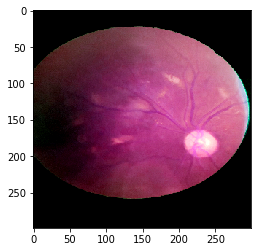

In [212]:
import matplotlib.pyplot as plt
plt.imshow(temp)

In [54]:
temp.shape

(3264, 2448, 3)